PROBLEM STATEMENT:-

We need to predict the absence of cardio vescular disease on the basis of some independent features


Dataset Description:-
    
There are 3 types of input features:

Objective: factual information;
    
Examination: results of medical examination;
    
Subjective: information given by the patient.
    
Features:

1. Age | Objective Feature | age | int (days)

2. Height | Objective Feature | height | int (cm) |

3. Weight | Objective Feature | weight | float (kg) |

4. Gender | Objective Feature | gender | categorical code |

5. Systolic blood pressure | Examination Feature | ap_hi | int |

6. Diastolic blood pressure | Examination Feature | ap_lo | int |

7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9. Smoking | Subjective Feature | smoke | binary |

10. Alcohol intake | Subjective Feature | alco | binary |

11. Physical activity | Subjective Feature | active | binary |

Target Variable:-

12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [2]:
#Importing all the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV

In [3]:
#!pip install scikit-optimize

In [4]:
#Importing the dataset into the notebook
#Creating A Cleaning Class
class FirstProcess:
        def __init__(self):
            pass
    
        def loading_data(self,filename):
            """Loading the data"""
            df=pd.read_csv(filename,sep=';')
            return df


In [5]:
#Checking the shape of the dataset
a=FirstProcess()
df=a.loading_data('cardio_train.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# Converting age(in days) to age in years by dividing it by 1 years=365 converting_some_data(df,'age')
df['age']=df['age']/365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# Changing rename of the columns
df.rename(columns={"gluc":"glucose","smoke":"Smoking","alco":"Alcohol","active":"Physical_Activity",
                   "cardio":"cardio_vascular_disease"},inplace=True)

In [8]:
#Dropping id because it is a irrelevant columns
df.drop('id',axis=1,inplace=True)

In [9]:
# Checking the missing values of the dataset
df.isnull().sum()

age                        0
gender                     0
height                     0
weight                     0
ap_hi                      0
ap_lo                      0
cholesterol                0
glucose                    0
Smoking                    0
Alcohol                    0
Physical_Activity          0
cardio_vascular_disease    0
dtype: int64

In [10]:
# Checking Anomalies in the dataset(In any columns)
class Anomalies:
    def __init__(self):
        pass

    def check_anomalies(self,df,columns):
        df=df[df[columns]<0]
        return df

In [11]:
a=Anomalies()
a.check_anomalies(df,'glucose')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [12]:
a.check_anomalies(df,'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [13]:
a.check_anomalies(df,'ap_hi')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease
4607,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
16021,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
20536,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
23988,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
25240,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
35040,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
46627,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0


In [14]:
a.check_anomalies(df,'ap_lo')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease
60106,61.838356,1,167,74.0,15,-70,1,1,0,0,1,1


In [15]:
#df.drop(index=[4607,16021,20536,23988,25240,35040,46627],inplace=True)

In [16]:
#df.drop(index=[60106],inplace=True)

In [17]:
a.check_anomalies(df,'cholesterol')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [18]:
a.check_anomalies(df,'Smoking')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [19]:
a.check_anomalies(df,'age')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [20]:
a.check_anomalies(df,'Alcohol')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [21]:
a.check_anomalies(df,'Physical_Activity')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [22]:
a.check_anomalies(df,'cardio_vascular_disease')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [23]:
#Exploratory Data Analysis

In [24]:
# Checking the boxplot of the Age
class Visualize:
        def __init__(self):
            pass
    
        def plot_histogram(self,df,columns):
            df=df[columns].hist()
            return df
        def plot_boxplot(self,df,columns):
            df=sns.boxplot(df[columns])
            return df

<AxesSubplot:>

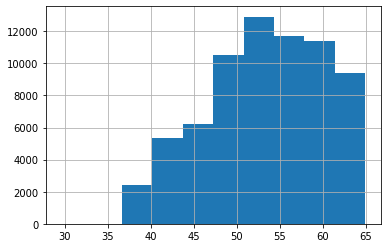

In [25]:
a=Visualize()
a.plot_histogram(df,'age')

<AxesSubplot:>

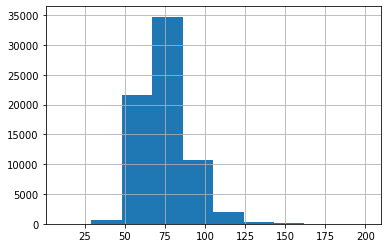

In [26]:
a.plot_histogram(df,'weight')

<AxesSubplot:>

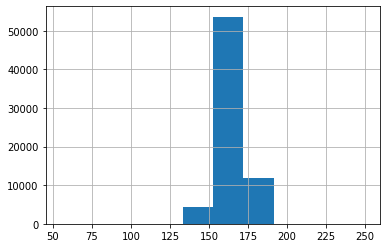

In [27]:
a.plot_histogram(df,'height')

<AxesSubplot:>

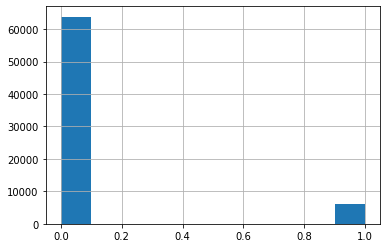

In [28]:
a.plot_histogram(df,'Smoking')

C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

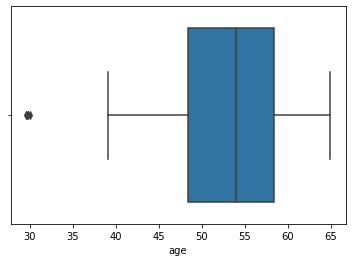

In [29]:
import seaborn as sns
a.plot_boxplot(df,'age')

C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weight'>

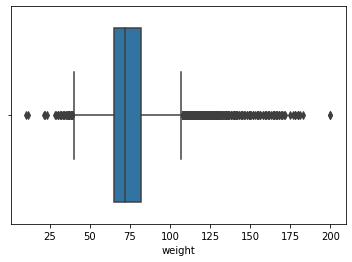

In [30]:
a.plot_boxplot(df,'weight')

C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='height'>

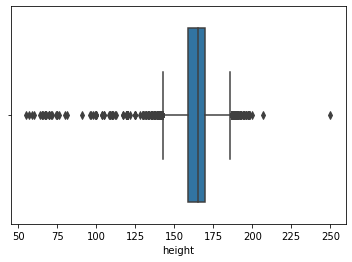

In [31]:
a.plot_boxplot(df,'height')

In [32]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'Smoking', 'Alcohol', 'Physical_Activity',
       'cardio_vascular_disease'],
      dtype='object')

C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cholesterol'>

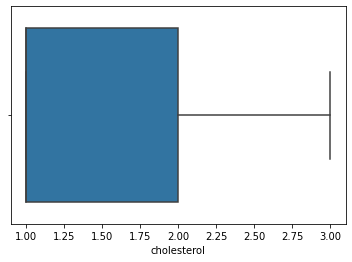

In [33]:
a.plot_boxplot(df,'cholesterol')

In [34]:
df['cardio_vascular_disease'].value_counts()

0    35021
1    34979
Name: cardio_vascular_disease, dtype: int64

In [35]:
X=df.drop('cardio_vascular_disease',axis=1)
y=df['cardio_vascular_disease']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
print('The training data is ',X_train.shape,y_train.shape)
print('The testing data is',X_test.shape,y_test.shape)

The training data is  (52500, 11) (52500,)
The testing data is (17500, 11) (17500,)


In [37]:
class Model_Building:
    def __init__(self,Model):
        print('----Model Building----')
        print()
        self.Model=Model
    
    def fit_data(self,data,targets):
        print()
        print('----Fitting the Data to the Model')
        self.Model=self.Model.fit(data,targets)
        return self.Model
    
    def predict_data(self,data):
        print()
        self.y_pred=self.Model.predict(data)
    def result_training_data(self,y_true,y_pred):
        print()
        print('-----RESULT OF TRAINING DATA-----')
        print()
        print('-----Accuracy score for Training Data-----')
        accuracy_score_train=accuracy_score(y_true,self.Model.predict(y_pred))
        print(accuracy_score_train)
        print()
        print('-----Confusion Matrix for Training Data-----')
        print()
        confusion_matrix_train=confusion_matrix(y_true,self.Model.predict(y_pred))
        print(confusion_matrix_train)
        print()
        print('-----Classification Report of Training Data-----')
        classification_report_train=classification_report(y_true,self.Model.predict(y_pred))
        print(classification_report_train)
        print()
        print('-----roc_auc_score of Training Data------')
        roc_auc_score_train=roc_auc_score(y_true,self.Model.predict(y_pred))
        print(roc_auc_score_train)
        print()
    def result_testing_data(self,y_true,y_pred):
        print('-----RESULT OF TESTING DATA-----')
        print('-----Accuracy score for Testing Data-----')
        accuracy_score_test=accuracy_score(y_true,self.y_pred)
        print(accuracy_score_test)
        print()
        print('-----Confusion Matrix for Testing Data-----')
        confusion_matrix_test=confusion_matrix(y_true,self.y_pred)
        print(confusion_matrix_test)
        print()
        print('-----Classification Report of Testing Data-----')
        classification_report_test=classification_report(y_true,self.y_pred)
        print(classification_report_test)
        print()
        print('-----roc_auc_score of Testing Data------')
        roc_auc_score_test=roc_auc_score(y_true,self.y_pred)
        print(roc_auc_score_test)
        
    def predict_probability(self,data):
        probability=self.Model.predict_proba(data)
        return probability

In [38]:
#probs = clf_log.predict_probability(X_test)
#preds = probs[:,1]
#fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

In [39]:
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

In [40]:
clf_log=Model_Building(LogisticRegression())
clf_log.fit_data(X_train,y_train)
y_pred=clf_log.predict_data(X_test)
clf_log.result_training_data(y_train,X_train)
clf_log.result_testing_data(y_test,y_pred)

----Model Building----


----Fitting the Data to the Model


C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7043047619047619

-----Confusion Matrix for Training Data-----

[[19459  6759]
 [ 8765 17517]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.69      0.74      0.71     26218
           1       0.72      0.67      0.69     26282

    accuracy                           0.70     52500
   macro avg       0.71      0.70      0.70     52500
weighted avg       0.71      0.70      0.70     52500


-----roc_auc_score of Training Data------
0.704350901776433

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7073714285714285

-----Confusion Matrix for Testing Data-----
[[6584 2219]
 [2902 5795]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      8803
           1       0.72      0.67      0.69      8697

    a

In [41]:
y_score = clf_log.fit_data(X_train, y_train).decision_function(X_test)
y_score


----Fitting the Data to the Model


C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([-1.13634193, -0.30966546,  0.34923695, ..., -0.53832976,
       -1.82365714,  0.67473959])

In [42]:
from sklearn.metrics import auc
probs = clf_log.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

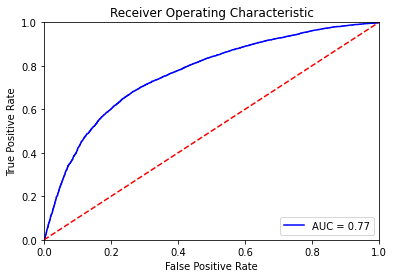

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
clf_decision=Model_Building(DecisionTreeClassifier(max_depth=8))
clf_decision.fit_data(X_train,y_train)
y_pred_decision=clf_decision.predict_data(X_test)
clf_decision.result_training_data(y_train,X_train)
clf_decision.result_testing_data(y_test,y_pred_decision)

----Model Building----


----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.742552380952381

-----Confusion Matrix for Training Data-----

[[20029  6189]
 [ 7327 18955]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     26218
           1       0.75      0.72      0.74     26282

    accuracy                           0.74     52500
   macro avg       0.74      0.74      0.74     52500
weighted avg       0.74      0.74      0.74     52500


-----roc_auc_score of Training Data------
0.7425784227124606

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7324571428571428

-----Confusion Matrix for Testing Data-----
[[6684 2119]
 [2563 6134]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      8803
 

In [45]:
probs_decision = clf_decision.predict_probability(X_test)
preds_decision = probs_decision[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_decision)
roc_auc_decision = auc(fpr, tpr)

In [46]:
print(fpr[1:5])

[0.00147677 0.00181756 0.00295354 0.00340793]


In [47]:
print(tpr[1:5])

[0.006439   0.00954352 0.01103829 0.01333793]


In [48]:
print(threshold[1:5])

[1.         0.97       0.96       0.94444444]


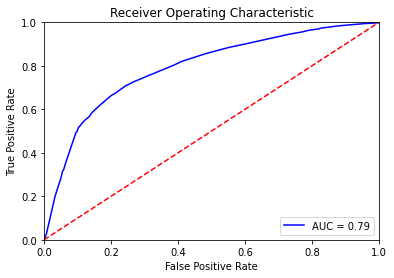

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_decision)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
param_grid=({
    'penalty':['l1','l2','elasticnet'],
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'solver':['newton-cg', 'lbfgs', 'liblinear','sag' ,'saga']
})

In [51]:
#clflog_grid=GridSearchCV(clf_log,param_grid=param_grid,scoring='f1',cv=5,verbose=3)
#clflog_grid.fit(X_train,y_train)

In [52]:
#clflog_grid.best_params_

In [53]:
#Plotting ROC_AUC Score
y_score = clf_log.fit_data(X_train, y_train).decision_function(X_test)
y_score


----Fitting the Data to the Model


C:\Users\asif\Anaconda3\envs\imarticus\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([-1.13634193, -0.30966546,  0.34923695, ..., -0.53832976,
       -1.82365714,  0.67473959])

In [54]:
probs = clf_log.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

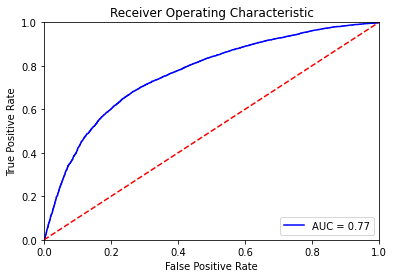

In [55]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
probs = clf_decision.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

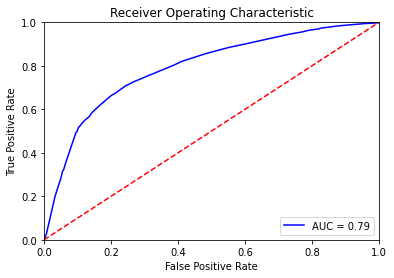

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
#param_grid_1=({
#    'criterion':['gini','entropy'],
#    'max_depth':np.arange(1,15,1),
#    'ccp_alpha':np.arange(0.1,0.5,0.01),
#})

In [59]:
#clf_decision_grid=GridSearchCV(clf_decision_tree,param_grid=param_grid_1,scoring='f1',cv=5,n_jobs=-1,
#                              verbose=5)
#clf_decision_grid.fit(X_train,y_train)

In [60]:
#clf_decision_grid.best_params_

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier

In [63]:
MLA=[
    #GLM
    LogisticRegression(C=0.2,solver='liblinear'),
    #Tree
    AdaBoostClassifier(),
    ExtraTreesClassifier(max_depth=15),
    GradientBoostingClassifier(),
    RandomForestClassifier(max_depth=15),
    DecisionTreeClassifier(max_depth=15),
    KNeighborsClassifier()
]

In [64]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [65]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA F1 Score']=f1_score(y_test,predicted)
    MLA_compare.loc[row_index,'MLA_ROC_AUC']=roc_auc_score(y_test,predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
      
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA F1 Score,MLA_ROC_AUC,MLA AUC
4,RandomForestClassifier,0.8187,0.7374,0.759818,0.689663,0.723043,0.737141,0.737141
3,GradientBoostingClassifier,0.7391,0.7367,0.755148,0.695757,0.724237,0.736439,0.736439
1,AdaBoostClassifier,0.7321,0.7292,0.769619,0.649534,0.704496,0.728720,0.728720
0,LogisticRegression,0.7179,0.7208,0.741784,0.672186,0.705272,0.720507,0.720507
5,DecisionTreeClassifier,0.8084,0.7018,0.719239,0.655973,0.686151,0.701496,0.701496
2,ExtraTreesClassifier,0.7380,0.6951,0.713813,0.645280,0.677819,0.694843,0.694843
6,KNeighborsClassifier,0.7799,0.6923,0.700339,0.665632,0.682544,0.692125,0.692125


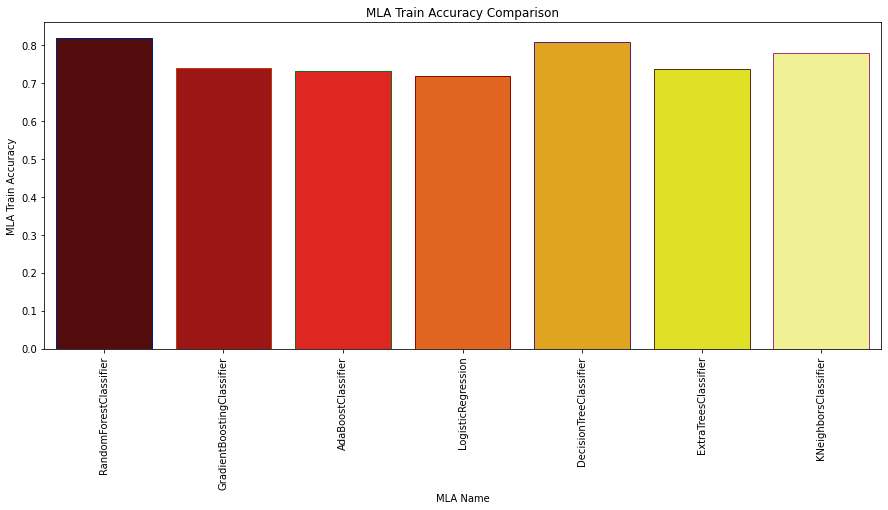

In [66]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

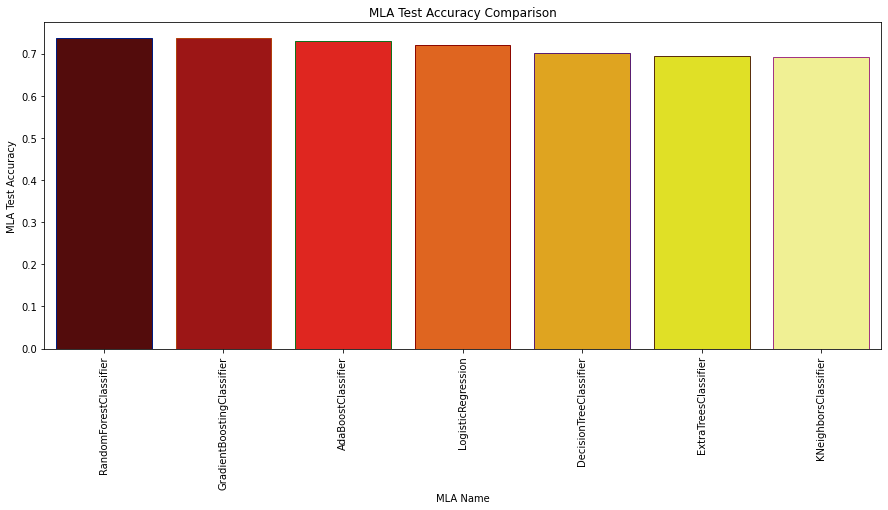

In [67]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

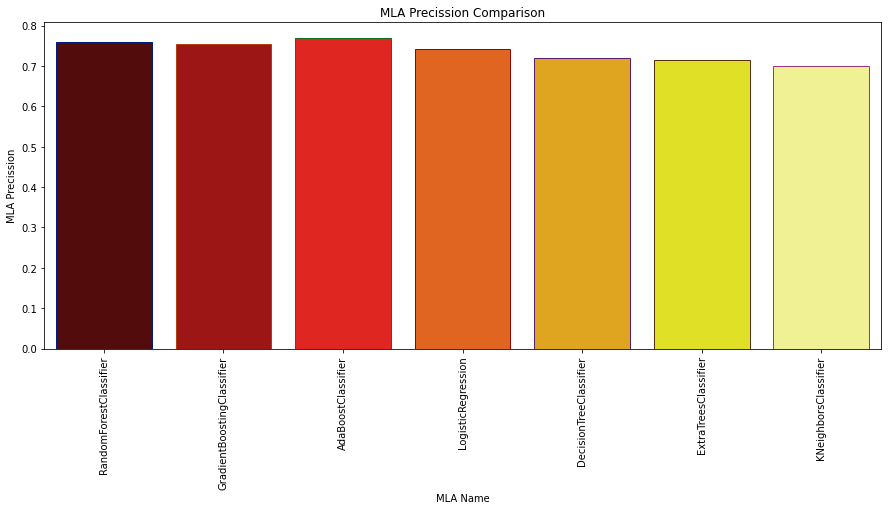

In [68]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

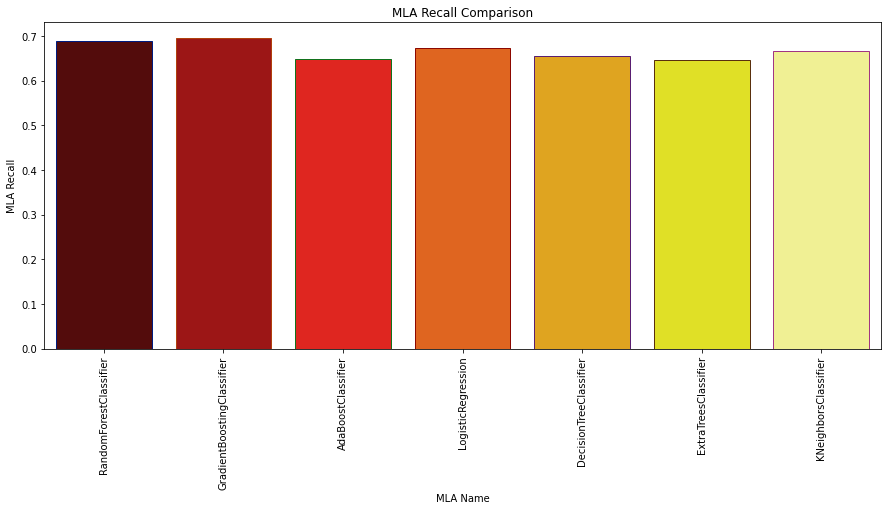

In [69]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

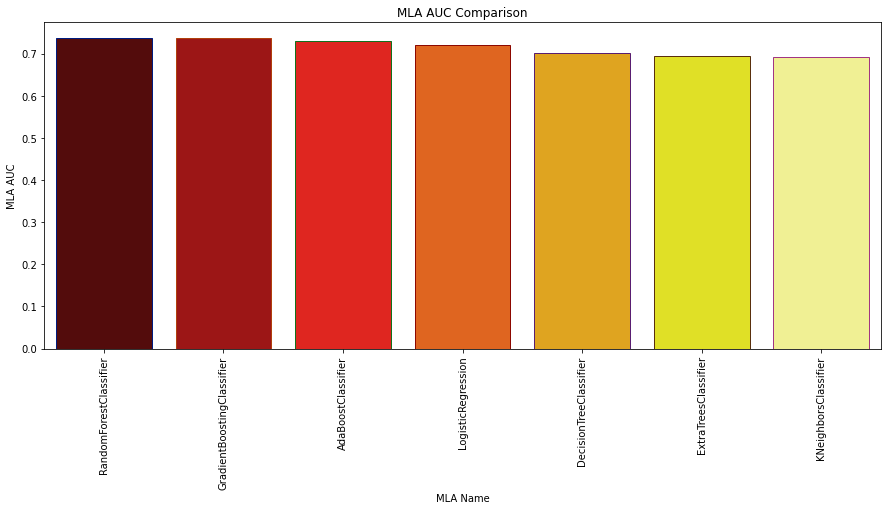

In [70]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

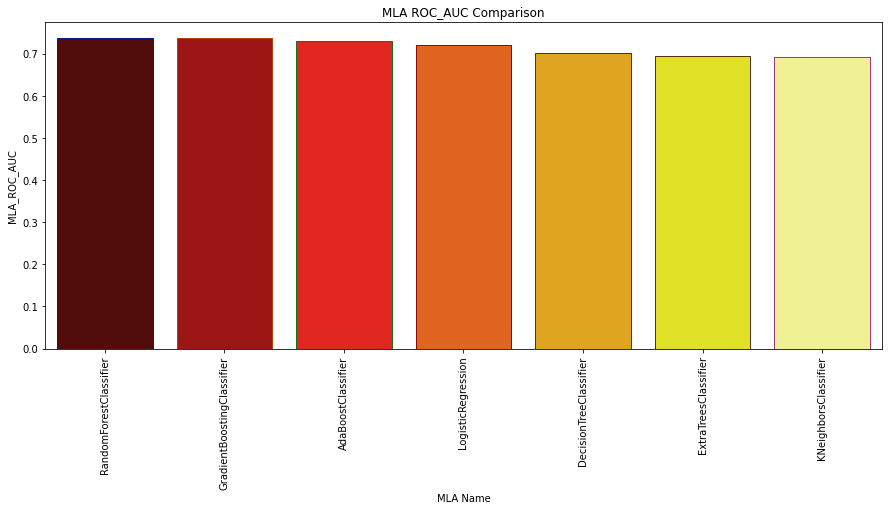

In [71]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA_ROC_AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA ROC_AUC Comparison')
plt.show()

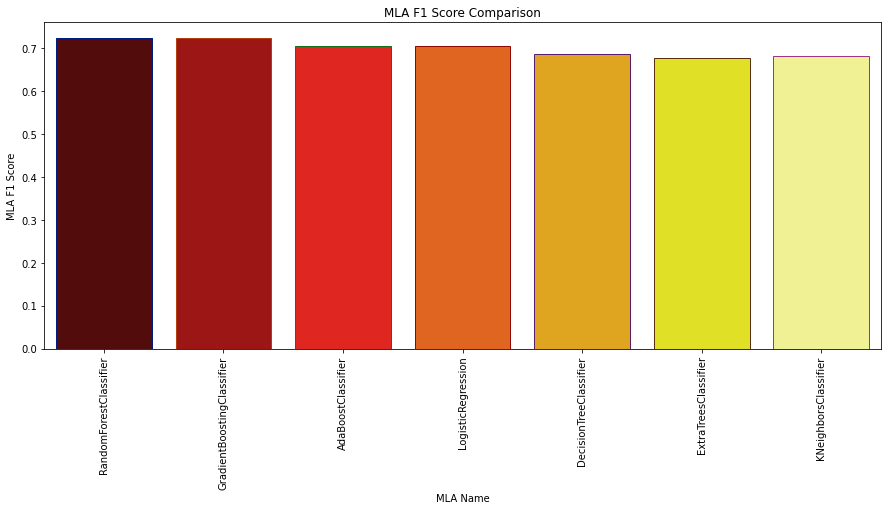

In [72]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA F1 Score",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA F1 Score Comparison')
plt.show()

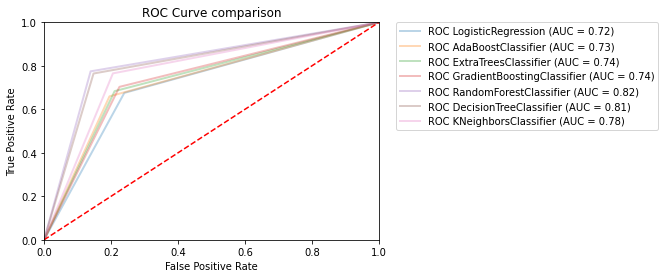

In [73]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_train,alg.predict(X_train))
    roc_auc_mla_train = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla_train))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

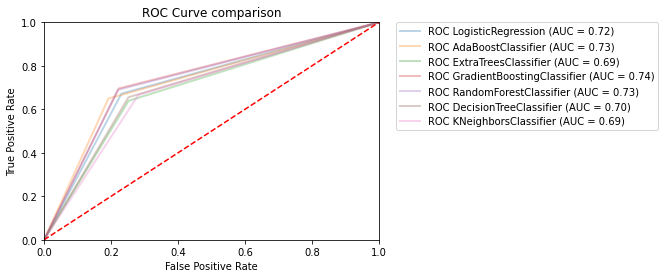

In [74]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [75]:
import numpy as np
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
#search_spaces=({
#    'max_depth':Integer(1,15),
#    'min_samples_split':Integer(3,10),
#    'min_samples_leaf':Integer(1,10),
#    'max_features':Categorical(['auto','log2','sqrt']),
#    'ccp_alpha':np.arange(0.01,0.5,0.1)
#})

In [76]:
#clf_decision_tree=DecisionTreeClassifier(random_state=1)
#clf_decision_tree.fit(X_train,y_train)

In [77]:
#y_pred_de=clf_decision_tree.predict(X_test)
#y_pred_de

In [78]:
#classification_report_decision_train=classification_report(y_train,clf_decision_tree.predict(X_train))
#print(classification_report_decision_train)
#classification_report_decision_test=classification_report(y_test,y_pred_de)
#print(classification_report_decision_test)

In [79]:
#clf_decision_grid=BayesSearchCV(clf_decision_tree,search_spaces=search_spaces,n_iter=50,scoring='f1',verbose=5,cv=5)
#clf_decision_grid.fit(X_train,y_train)

In [80]:
#clf_decision_grid.best_params_

In [81]:
#print("train score : %s" % clf_decision_grid.best_score_)
#print("test score: %s" % clf_decision_grid.score(X_test, y_test))

In [82]:
#y_pred_bayes=clf_decision_grid.predict(X_test)
#y_pred_bayes

In [83]:
#After BayesSearchCV
class Tuning:

    def __init__(self):
        pass
    def metrics(self):
        print('Model After BayesSearchCV')
        confusion_matrix_train=confusion_matrix(y_train,clf_decision_grid.predict(X_train))
        print(confusion_matrix_train)
        print()
        confusion_matrix_test=confusion_matrix(y_test,y_pred_bayes)
        print(confusion_matrix_test)
        print()
        classification_report_decision_bayes=classification_report(y_train,clf_decision_grid.predict(X_train))
        print(classification_report_decision_bayes)
        print()
        classification_report_test_bayes=classification_report(y_test,y_pred_bayes)
        print(classification_report_test_bayes)
        print()
        roc_auc_score_train=roc_auc_score(y_train,clf_decision_grid.predict(X_train))
        print(roc_auc_score_train)
        print()
        roc_auc_score_test=roc_auc_score(y_test,y_pred_bayes)
        print(roc_auc_score_test)

In [84]:
#tuning_classifier=Tuning()
#tuning_classifier.metrics()

In [85]:
#!pip install hyperopt

Implementing HyperOpt 

In [86]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [87]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
         'ccp_alpha':hp.quniform('ccp_alpha',0.01,0.5,0.1)
}

In [88]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1375697da58>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1375697db00>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1375697d5c0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1375697d438>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1375697d780>,
 'ccp_alpha': <hyperopt.pyll.base.Apply at 0x1375697d6d8>}

In [89]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = DecisionTreeClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 ccp_alpha=space['ccp_alpha']
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [90]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [00:22<00:00,  3.58trial/s, best loss: -0.7302857142857142]


{'ccp_alpha': 0.0,
 'criterion': 0,
 'max_depth': 1160.0,
 'max_features': 3,
 'min_samples_leaf': 0.0025315471012753916,
 'min_samples_split': 0.03525106736621103}

In [91]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
#est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])

entropy
None


In [92]:
best['min_samples_leaf']

0.0025315471012753916

In [93]:

traineddecision = DecisionTreeClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'],).fit(X_train,y_train)
predictiondecision = traineddecision.predict(X_test)
print(confusion_matrix(y_test,predictiondecision))
print(accuracy_score(y_test,predictiondecision))
print(classification_report(y_test,predictiondecision))
acc5 = accuracy_score(y_test,predictiondecision)

[[6862 1941]
 [2728 5969]]
0.7332
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      8803
           1       0.75      0.69      0.72      8697

    accuracy                           0.73     17500
   macro avg       0.74      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



Genetic Algorithms

Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's immagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [94]:
#!pip install tpot

In [95]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {      'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [105]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 10, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.tree.DecisionTreeClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7222476190476191

Generation 2 - Current best internal CV score: 0.7222476190476191

Generation 3 - Current best internal CV score: 0.7222476190476191

Generation 4 - Current best internal CV score: 0.7238095238095238

Generation 5 - Current best internal CV score: 0.7238095238095238

Generation 6 - Current best internal CV score: 0.7242666666666667

Generation 7 - Current best internal CV score: 0.7242666666666667

Generation 8 - Current best internal CV score: 0.7242666666666667

Generation 9 - Current best internal CV score: 0.7242666666666667

Generation 10 - Current best internal CV score: 0.7242666666666667

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=14)


TPOTClassifier(config_dict={'sklearn.tree.DecisionTreeClassifier': {'criterion': ['entropy',
                                                                                  'gini'],
                                                                    'max_depth': [10,
                                                                                  120,
                                                                                  230,
                                                                                  340,
                                                                                  450,
                                                                                  560,
                                                                                  670,
                                                                                  780,
                                                                                  890,
                                  

In [97]:
y_pred_tpot=tpot_classifier.predict(X_test)
y_pred_tpot

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [98]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.7246285714285714


In [99]:
class Tuning_TPOT:

    def __init__(self):
        pass
    def metrics(self):
      print('Model After Tuning TPOTClassifier')
      confusion_matrix_train=confusion_matrix(y_train,tpot_classifier.predict(X_train))
      print(confusion_matrix_train)
      print()
      confusion_matrix_test=confusion_matrix(y_test,y_pred_tpot)
      print(confusion_matrix_test)
      print()
      classification_report_decision_bayes=classification_report(y_train,tpot_classifier.predict(X_train))
      print(classification_report_decision_bayes)
      print()
      classification_report_test_bayes=classification_report(y_test,y_pred_tpot)
      print(classification_report_test_bayes)
      print()
      roc_auc_score_train=roc_auc_score(y_train,tpot_classifier.predict(X_train))
      print(roc_auc_score_train)
      print()
      roc_auc_score_test=roc_auc_score(y_test,y_pred_tpot)
      print(roc_auc_score_test)

In [100]:
a=Tuning_TPOT()
a.metrics()

Model After Tuning TPOTClassifier
[[20845  5373]
 [ 8188 18094]]

[[6906 1897]
 [2922 5775]]

              precision    recall  f1-score   support

           0       0.72      0.80      0.75     26218
           1       0.77      0.69      0.73     26282

    accuracy                           0.74     52500
   macro avg       0.74      0.74      0.74     52500
weighted avg       0.74      0.74      0.74     52500


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      8803
           1       0.75      0.66      0.71      8697

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500


0.7417602185033488

0.7242636794341294


In [109]:
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param= {      'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}
print(param)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [110]:
tpot_rf=TPOTClassifier(generations=10,population_size=24,offspring_size=12,verbosity=2,early_stop=12,
config_dict={'sklearn.ensemble.RandomForestClassifier':param},scoring='accuracy',cv=4,n_jobs=-1)

In [111]:
%%time
tpot_rf.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7344952380952381

Generation 2 - Current best internal CV score: 0.7344952380952381

Generation 3 - Current best internal CV score: 0.7344952380952381

Generation 4 - Current best internal CV score: 0.7344952380952381

Generation 5 - Current best internal CV score: 0.7344952380952381

Generation 6 - Current best internal CV score: 0.7344952380952381

Generation 7 - Current best internal CV score: 0.7344952380952381

Generation 8 - Current best internal CV score: 0.7344952380952381

Generation 9 - Current best internal CV score: 0.7349904761904762

Generation 10 - Current best internal CV score: 0.7349904761904762

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [112]:
y_pred_rf=tpot_rf.predict(X_test)

In [116]:
confusion_matrix_train=confusion_matrix(y_train,tpot_rf.predict(X_train))
print(confusion_matrix_train)
confusion_matrix_test=confusion_matrix(y_test,y_pred_rf)
print(confusion_matrix_test)
classification_report_rf_train=classification_report(y_train,tpot_rf.predict(X_train))
print(classification_report_rf_train)
classification_report_rf_test=classification_report(y_test,y_pred_rf)
print(classification_report_rf_test)

[[21049  5169]
 [ 7671 18611]]
[[6955 1848]
 [2736 5961]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77     26218
           1       0.78      0.71      0.74     26282

    accuracy                           0.76     52500
   macro avg       0.76      0.76      0.75     52500
weighted avg       0.76      0.76      0.75     52500

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8803
           1       0.76      0.69      0.72      8697

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500

